#PHASE 1: DATA LOADING & CLEANING

##1.1 Load Datasets

In [77]:
import pandas as pd
import numpy as np

# Load with correct encoding (handles Cyrillic column names)
transactions = pd.read_csv('транзакции_в_Мобильном_интернет_Банкинге.csv',
encoding='latin-1',
sep=';',
skiprows=1 # Skip Russian header
)

behavior = pd.read_csv('поведенческие_паттерны_клиентов_3.csv',
encoding='latin-1',
sep=';',
skiprows=1
)

In [78]:
# Rename to English<a></a>
trans_cols = ['cst_dim_id', 'transdate', 'transdatetime', 'amount', 'docno', 'direction', 'target']
transactions.columns = trans_cols

behavior_cols = ['transdate','cst_dim_id', 'monthly_os_changes', 'monthly_phone_model_changes',
  'last_phone_model', 'last_os', 'logins_7d', 'logins_30d', 'freq_7d', 'freq_30d', 'freq_change_ratio',
  'logins_ratio_7_30', 'avg_interval_30d', 'std_interval_30d', 'var_interval_30d', 'ewm_interval_7d',
  'burstiness', 'fano_factor','zscore_7d']
behavior.columns = behavior_cols

In [79]:
transactions

,cst_dim_id,transdate,transdatetime,amount,docno,direction,target
0,2.937833e+09,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0
1,2.096229e+09,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0
2,2.937760e+09,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0
3,2.933493e+09,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0
4,4.560006e+08,'2024-12-18 00:00:00.000','2024-12-18 14:12:25.000',20000.0,7128,87b698d1edae13c21ce86678de3b8546,0
...,...,...,...,...,...,...,...
13108,2.938282e+09,'2025-02-11 00:00:00.000','2025-02-11 17:43:15.000',239000.0,3829,8cfe18d7e0cff4060f90649295efdaf6,0
13109,2.684693e+09,'2024-12-02 00:00:00.000','2024-12-02 09:33:18.000',148000.0,8466,0f4b6e1a4bc070cdfdef75c13e38a3e6,0
13110,4.560884e+08,'2025-07-06 00:00:00.000','2025-07-06 14:19:44.000',2400.0,8926,f17d6300fb05c9772d4943dc6f0b09d6,0
13111,4.529667e+08,'2025-06-12 00:00:00.000','2025-06-12 16:09:44.000',200000.0,3574,7d1e70b8accfc86fff6ecb2a90704dd6,1


In [80]:
behavior

,transdate,cst_dim_id,monthly_os_changes,monthly_phone_model_changes,last_phone_model,last_os,logins_7d,logins_30d,freq_7d,freq_30d,freq_change_ratio,logins_ratio_7_30,avg_interval_30d,std_interval_30d,var_interval_30d,ewm_interval_7d,burstiness,fano_factor,zscore_7d
0,'2025-03-05 00:00:00.000',4.530244e+08,2,2,Vivo V2116,Android/13,6,20,0.857143,0.6666666666666666,0.2857142857142857,0.300000,131460.000000,213919.478309,45761543200,23007.164410,0.238750,348102.412901,-0.221074
1,'2025-05-19 00:00:00.000',4.986364e+08,1,1,Xiaomi_m2006c3mg,Android/10,2,22,0.285714,0.7333333333333333,-0.6103896103896104,0.090909,101520.000000,82733.726442,6844869490.909091,178980.000000,-0.101959,67423.852353,0.936257
2,'2025-08-04 00:00:00.000',2.934905e+09,1,1,"iPhone16,1",iOS/18.5,2,2,0.285714,0.06666666666666667,3.2857142857142856,1.000000,67800.000000,-1.000000,-1.0,67800.000000,-1.000000,-1.000000,-1.000000
3,'2025-03-05 00:00:00.000',4.561731e+08,1,2,Vivo V2058,Android/13,5,37,0.714286,1.2333333333333334,-0.42084942084942084,0.135135,61394.594595,76777.321398,5894757081.081081,9400.733945,0.111330,96014.268357,-0.508739
4,'2025-06-26 00:00:00.000',2.933725e+09,1,1,"iPhone12,1",iOS/17.6.1,37,119,5.285714,3.966666666666667,0.33253301320528206,0.310924,22751.500000,33089.101678,1094888649.8319328,18828.504487,0.185127,48123.800621,-0.231693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8582,'2025-03-04 00:00:00.000',4.529513e+08,1,1,"iPhone10,5",iOS/16.7.10,16,40,2.285714,1.3333333333333333,0.7142857142857143,0.400000,47551.000000,87805.264382,7709764453.220339,12899.501572,0.297395,162136.746929,-0.151050
8583,'2025-03-30 00:00:00.000',4.529102e+08,2,2,"iPhone14,2",iOS/18.1,7,38,1.000000,1.2666666666666666,-0.21052631578947364,0.184211,68701.621622,97972.572168,9598624897.297297,19188.443255,0.175618,139714.677336,0.209940
8584,'2025-03-30 00:00:00.000',4.549666e+08,1,1,Xiaomi 2201117SG,Android/13,8,26,1.142857,0.8666666666666667,0.31868131868131855,0.307692,85338.181818,129096.796955,16665982984.09091,1043.012171,0.204065,195293.391879,-0.133728
8585,'2025-03-04 00:00:00.000',4.509121e+08,2,2,Xiaomi M2006C3LG,Android/11,37,62,5.285714,2.066666666666667,1.5576036866359444,0.596774,40484.545455,62661.679989,3926486139.020979,116861.355300,0.215007,96987.284776,-0.403456


##1.2 Data Cleaning

In [81]:
# Convert to numeric
transactions['cst_dim_id'] = pd.to_numeric(transactions['cst_dim_id'], errors='coerce')
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce')
transactions['target'] = pd.to_numeric(transactions['target'], errors='coerce')
behavior['cst_dim_id'] = pd.to_numeric(behavior['cst_dim_id'], errors='coerce')
for col in behavior.columns[2:]:
    # if col not in ['last_phone_model', 'last_os']:
        behavior[col] = pd.to_numeric(behavior[col], errors='coerce')

# Remove rows with missing client ID (6 transactions)
transactions = transactions[transactions['cst_dim_id'].notna()]

# Merge datasets
merged = transactions.merge(behavior, on=['cst_dim_id', 'transdate'], how='left')

# Handle missing values in behavior
behavior_cols_to_impute = ['freq_30d', 'freq_change_ratio', 'logins_ratio_7_30', 'monthly_os_changes']
for col in behavior_cols_to_impute:
    if col in merged.columns:
        median_val = merged[col].median()
        merged[col].fillna(median_val, inplace=True)

# Handle -1 sentinel values (missing indicators)
for col in merged.columns[8:]: # Behavioral columns
    if merged[col].dtype in ['float64', 'int64']:
        merged[col] = merged[col].replace(-1, np.nan)
        merged[col].fillna(merged[col].median(), inplace=True)


print(f"Merged dataset shape: {merged.shape}")
print(f"Missing values:\n{merged.isnull().sum()}")
print(f"Fraud rate: {(merged['target']==1).sum() / len(merged) * 100:.2f}%")

Merged dataset shape: (13126, 24)
Missing values:
cst_dim_id                         0
transdate                          0
transdatetime                      0
amount                             0
docno                              0
direction                          0
target                             0
monthly_os_changes                 0
monthly_phone_model_changes        0
last_phone_model               13126
last_os                        13126
logins_7d                          0
logins_30d                         0
freq_7d                            0
freq_30d                           0
freq_change_ratio                  0
logins_ratio_7_30                  0
avg_interval_30d                   0
std_interval_30d                   0
var_interval_30d                   0
ewm_interval_7d                    0
burstiness                         0
fano_factor                        0
zscore_7d                          0
dtype: int64
Fraud rate: 1.26%


/tmp/ipykernel_1879/929005638.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(median_val, inplace=True)
/tmp/ipykernel_1879/929005638.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

#PHASE 2: FEATURE ENGINEERING

##2.1 Transaction-Level Features

In [82]:
from datetime import datetime
import pandas as pd
import numpy as np

# Parse dates
merged['transdate'] = pd.to_datetime(merged['transdate'])
merged['transdatetime'] = pd.to_datetime(merged['transdatetime'])

# Amount features - handle negative/zero values for log transform
merged['amount_log'] = np.log1p(merged['amount'].clip(lower=0))  # clip negative values
merged['amount_bin'] = pd.qcut(merged['amount'], q=4, labels=['tiny', 'small', 'medium', 'large'])

# Temporal features
merged['hour_of_day'] = merged['transdatetime'].dt.hour
merged['day_of_week'] = merged['transdatetime'].dt.dayofweek
merged['is_weekend'] = (merged['day_of_week'] >= 5).astype(int)
merged['month'] = merged['transdate'].dt.month

# Activity features
recipient_freq = merged.groupby('direction').size().to_dict()
merged['recipient_frequency'] = merged['direction'].map(recipient_freq)

# Client activity in time windows - use transform instead of apply
for days in [7, 30]:
    col_name = f'client_tx_count_{days}d'
    merged[col_name] = merged.groupby('cst_dim_id')['transdate'].transform(
        lambda x: (x >= x.iloc[-1] - pd.Timedelta(days=days)).sum()
    )

##2.2 Behavioral Derived Features

In [83]:
# Device instability
merged['device_instability'] = (merged['monthly_os_changes'] +
                                merged['monthly_phone_model_changes']) / 2

# Login surge
merged['login_surge_ratio'] = merged['freq_7d'] / (merged['freq_30d'] + 1e-5)

# Account dormancy
merged['is_inactive_user'] = (merged['logins_30d'] < 5).astype(int)

# Session anomalies
merged['session_interval_anomaly'] = (abs(merged['zscore_7d']) > 2).astype(int)

# Burstiness
merged['login_burstiness_high'] = (merged['burstiness'] > 0.3).astype(int)

# Recent device change
merged['recent_device_change'] = (merged['monthly_phone_model_changes'] > 0).astype(int)


##2.3 Interaction Features

In [84]:
# Interactions
amount_median = merged['amount'].median()
amount_p75 = merged['amount'].quantile(0.75)

merged['device_instability_x_amount'] = (
    merged['device_instability'] * (merged['amount'] > amount_median).astype(int)
)

merged['inactive_x_large_tx'] = (
    merged['is_inactive_user'] * (merged['amount'] > amount_p75).astype(int)
)

# Anomaly timing interaction
merged['anomaly_timing'] = (
    ((merged['hour_of_day'] < 8) | (merged['hour_of_day'] >= 17)).astype(int) *
    merged['session_interval_anomaly']
)

##2.4 Encoding & Feature Selection

In [85]:
# Select final features
feature_cols = [
    # Transaction features
    'amount_log',
    'hour_of_day',
    'is_weekend',
    'recipient_frequency',
    'client_tx_count_7d',
    'client_tx_count_30d',
    # Behavioral features
    'device_instability',
    'login_surge_ratio',
    'is_inactive_user',
    'session_interval_anomaly',
    'login_burstiness_high',
    'recent_device_change',
    'monthly_os_changes',
    'monthly_phone_model_changes',
    'logins_7d',
    'logins_30d',
    'freq_7d',
    'freq_change_ratio',
    'avg_interval_30d',
    'std_interval_30d',
    'burstiness',
    'fano_factor',
    'zscore_7d',
    # Interaction features
    'device_instability_x_amount',
    'inactive_x_large_tx',
    'anomaly_timing'
]

# Convert to categorical for encoding
merged['day_of_week'] = merged['day_of_week'].astype('category')
merged['month'] = merged['month'].astype('category')

# One-Hot Encode categorical features
encoded = pd.get_dummies(
    merged[['day_of_week', 'month', 'amount_bin']],
    prefix=['dow', 'month', 'amount'],
    drop_first=True
)

# Combine features
X = merged[feature_cols].copy()
X = pd.concat([X, encoded], axis=1)
y = merged['target'].copy()

print(f"Final feature matrix shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

Final feature matrix shape: (13126, 44)
Features: ['amount_log', 'hour_of_day', 'is_weekend', 'recipient_frequency', 'client_tx_count_7d', 'client_tx_count_30d', 'device_instability', 'login_surge_ratio', 'is_inactive_user', 'session_interval_anomaly', 'login_burstiness_high', 'recent_device_change', 'monthly_os_changes', 'monthly_phone_model_changes', 'logins_7d', 'logins_30d', 'freq_7d', 'freq_change_ratio', 'avg_interval_30d', 'std_interval_30d', 'burstiness', 'fano_factor', 'zscore_7d', 'device_instability_x_amount', 'inactive_x_large_tx', 'anomaly_timing', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_11', 'month_12', 'amount_small', 'amount_medium', 'amount_large']


#PHASE 3: DATA SPLITTING

##3.1 Time-Based Train-Val-Test Split

In [86]:
# Sort by date
merged_sorted = merged.sort_values('transdate').reset_index(drop=True)

# Calculate split points
n = len(merged_sorted)
train_idx = int(n * 0.6)
val_idx = int(n * 0.8)

# Split
idx_train = range(0, train_idx)
idx_val = range(train_idx, val_idx)
idx_test = range(val_idx, n)

X_train = X.iloc[idx_train]
X_val = X.iloc[idx_val]
X_test = X.iloc[idx_test]

y_train = y.iloc[idx_train]
y_val = y.iloc[idx_val]
y_test = y.iloc[idx_test]

print(f"Train: {len(X_train)} ({y_train.mean()*100:.2f}% fraud)")
print(f"Val: {len(X_val)} ({y_val.mean()*100:.2f}% fraud)")
print(f"Test: {len(X_test)} ({y_test.mean()*100:.2f}% fraud)")


Train: 7875 (1.27% fraud)
Val: 2625 (1.22% fraud)
Test: 2626 (1.26% fraud)


##3.2 Scaling & SMOTE

In [87]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# SMOTE on training set only
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE: {len(X_train_resampled)} samples, {y_train_resampled.mean()*100:.2f}% fraud")


After SMOTE: 8552 samples, 9.09% fraud


#PHASE 4: MODEL TRAINING

##4.1 XGBoost

In [88]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [44]:
import optuna
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import precision_recall_curve, auc

def pr_auc_score(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)

def objective_xgb_pr_auc(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 4, 8),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.03, 0.05, 0.1]),
        "subsample": trial.suggest_categorical("subsample", [0.6, 0.8, 1.0]),
        "colsample_bytree": trial.suggest_categorical("colsample_bytree", [0.6, 0.8, 1.0]),
        "min_child_weight": 5,
        "scale_pos_weight": 39,
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist",
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train_scaled, y_train)

    y_proba_val = model.predict_proba(X_val_scaled)[:, 1]

    # Metric to optimize: PR-AUC
    pr_auc = pr_auc_score(y_val, y_proba_val)

    return pr_auc

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb_pr_auc, n_trials=50)
xgb_best_params = study_xgb.best_params

print("Best params:", xgb_best_params)
print("Best PR-AUC:", study_xgb.best_value)

[I 2025-11-27 16:09:55,127] A new study created in memory with name: no-name-00871c91-0f66-41cb-871b-1ffb5a3756bd
[I 2025-11-27 16:09:55,635] Trial 0 finished with value: 0.5097965082021079 and parameters: {'n_estimators': 210, 'max_depth': 8, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 0 with value: 0.5097965082021079.
[I 2025-11-27 16:09:55,814] Trial 1 finished with value: 0.6037861732809849 and parameters: {'n_estimators': 104, 'max_depth': 7, 'learning_rate': 0.05, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.6037861732809849.
[I 2025-11-27 16:09:56,019] Trial 2 finished with value: 0.601635020318128 and parameters: {'n_estimators': 106, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.6037861732809849.
[I 2025-11-27 16:09:56,379] Trial 3 finished with value: 0.617375333709133 and parameters: {'n_estimators': 225, 'max_depth': 7, 'learning_rate': 0.05, 

Best params: {'n_estimators': 274, 'max_depth': 8, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.6}
Best PR-AUC: 0.6341491400108389


In [89]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(**xgb_best_params)

xgb_model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_val_scaled, y_val)]
)

pred_xgb_val = xgb_model.predict_proba(X_val_scaled)[:, 1]
pred_xgb_test = xgb_model.predict_proba(X_test_scaled)[:, 1]

[0]	validation_0-logloss:0.11461
[1]	validation_0-logloss:0.10362
[2]	validation_0-logloss:0.09887
[3]	validation_0-logloss:0.09179
[4]	validation_0-logloss:0.08592
[5]	validation_0-logloss:0.07991
[6]	validation_0-logloss:0.07499
[7]	validation_0-logloss:0.07002
[8]	validation_0-logloss:0.06541
[9]	validation_0-logloss:0.06210
[10]	validation_0-logloss:0.05873
[11]	validation_0-logloss:0.05562
[12]	validation_0-logloss:0.05300
[13]	validation_0-logloss:0.05097
[14]	validation_0-logloss:0.04848
[15]	validation_0-logloss:0.04619
[16]	validation_0-logloss:0.04435
[17]	validation_0-logloss:0.04308
[18]	validation_0-logloss:0.04192
[19]	validation_0-logloss:0.04071
[20]	validation_0-logloss:0.03928
[21]	validation_0-logloss:0.03842
[22]	validation_0-logloss:0.03745
[23]	validation_0-logloss:0.03652


[24]	validation_0-logloss:0.03555
[25]	validation_0-logloss:0.03496
[26]	validation_0-logloss:0.03420
[27]	validation_0-logloss:0.03345
[28]	validation_0-logloss:0.03273
[29]	validation_0-logloss:0.03208
[30]	validation_0-logloss:0.03142
[31]	validation_0-logloss:0.03107
[32]	validation_0-logloss:0.03058
[33]	validation_0-logloss:0.03003
[34]	validation_0-logloss:0.02965
[35]	validation_0-logloss:0.02933
[36]	validation_0-logloss:0.02912
[37]	validation_0-logloss:0.02899
[38]	validation_0-logloss:0.02843
[39]	validation_0-logloss:0.02814
[40]	validation_0-logloss:0.02791
[41]	validation_0-logloss:0.02762
[42]	validation_0-logloss:0.02741
[43]	validation_0-logloss:0.02723
[44]	validation_0-logloss:0.02717
[45]	validation_0-logloss:0.02699
[46]	validation_0-logloss:0.02699
[47]	validation_0-logloss:0.02675
[48]	validation_0-logloss:0.02682
[49]	validation_0-logloss:0.02664
[50]	validation_0-logloss:0.02653
[51]	validation_0-logloss:0.02640
[52]	validation_0-logloss:0.02624
[53]	validatio

##4.2 LightGBM

In [108]:
import lightgbm as lgb
from sklearn.metrics import f1_score, recall_score

def objective_lgb(trial):
    params = {
        "n_estimators": 200,
        "num_leaves": trial.suggest_categorical("num_leaves", [20, 31, 50, 70]),
        "max_depth": trial.suggest_categorical("max_depth", [5, 7, 10, 15]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.03, 0.05, 0.1]),
        "min_data_in_leaf": trial.suggest_categorical("min_data_in_leaf", [10, 20, 30]),
        "feature_fraction": trial.suggest_categorical("feature_fraction", [0.6, 0.8, 1.0]),
        "bagging_fraction": trial.suggest_categorical("bagging_fraction", [0.6, 0.8, 1.0]),
        "bagging_freq": 1,
        "is_unbalance": True,
        "random_state": 42,
        "n_jobs": -1,
        "objective": "binary",
        "metric": "auc",
        "verbose": -1,
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_scaled, y_train)

    y_proba_val = model.predict_proba(X_val_scaled)[:, 1]
    # Metric to optimize: PR-AUC
    pr_auc = pr_auc_score(y_val, y_proba_val)

    return pr_auc

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=50)
lgb_best_params = study_lgb.best_params

print("Best LGB params:", lgb_best_params)
print("Best LGB F1:", study_lgb.best_value)


[I 2025-11-27 17:27:05,026] A new study created in memory with name: no-name-61c9b2ed-bab3-4e72-b822-a2380ddd497d
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-27 17:27:05,414] Trial 0 finished with value: 0.5763930460668688 and parameters: {'num_leaves': 31, 'max_depth': 5, 'learning_rate': 0.01, 'min_data_in_leaf': 20, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}. Best is trial 0 with value: 0.5763930460668688.
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-27 17:27:05,751] Trial 1 finished with value: 0.4557692858708277 and parameters: {'num_leaves': 20, 'max_depth': 5, 'learning_rate': 0.01, 'min_data_in_leaf': 10, 'feature_fraction': 0.6, 'bagging_f

Best LGB params: {'num_leaves': 50, 'max_depth': 7, 'learning_rate': 0.05, 'min_data_in_leaf': 30, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}
Best LGB F1: 0.6526239481962333


In [109]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(**lgb_best_params)

lgb_model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_val_scaled, y_val)],
    eval_metric='auc'
)

pred_lgb_val = lgb_model.predict_proba(X_val_scaled)[:, 1]
pred_lgb_test = lgb_model.predict_proba(X_test_scaled)[:, 1]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##4.3 Random Forest

In [110]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score

def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 200, 300, 400]),
        "max_depth": trial.suggest_categorical("max_depth", [10, 15, 20, 25, None]),
        "min_samples_split": trial.suggest_categorical("min_samples_split", [2, 5, 10, 15]),
        "min_samples_leaf": trial.suggest_categorical("min_samples_leaf", [1, 2, 5, 10]),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced",
        "oob_score": True,
        "n_jobs": -1,
        "random_state": 42
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train_scaled, y_train)

    y_proba_val = model.predict_proba(X_val_scaled)[:, 1]
    # Metric to optimize: PR-AUC
    pr_auc = pr_auc_score(y_val, y_proba_val)

    return pr_auc

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)
rf_best_params = study_rf.best_params

print("Best RF params:", rf_best_params)
print("Best RF F1:", study_rf.best_value)


[I 2025-11-27 17:28:03,071] A new study created in memory with name: no-name-e830d5b0-aa51-4a95-b5fa-ebc4e85ee347
[I 2025-11-27 17:28:05,046] Trial 0 finished with value: 0.5554281734258922 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.5554281734258922.
[I 2025-11-27 17:28:10,146] Trial 1 finished with value: 0.45885680800665374 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.5554281734258922.
[I 2025-11-27 17:28:11,265] Trial 2 finished with value: 0.5737528987078814 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5737528987078814.
[I 2025-11-27 17:28:13,038] Trial 3 finished with value: 0.5310943877131471 and parameters: {'n_estimators': 300, 'max_depth': 10, '

Best RF params: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best RF F1: 0.588216798681332


In [111]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(**rf_best_params)

rf_model.fit(X_train_resampled, y_train_resampled)

pred_rf_val = rf_model.predict_proba(X_val_scaled)[:, 1]
pred_rf_test = rf_model.predict_proba(X_test_scaled)[:, 1]


##4.4 Ensemble Stacking

In [112]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create meta-features from validation predictions
meta_features_val = np.column_stack([pred_xgb_val, pred_lgb_val, pred_rf_val])
meta_features_test = np.column_stack([pred_xgb_test, pred_lgb_test, pred_rf_test])

# Train meta-learner
meta_learner = LogisticRegression(C=1.0, random_state=42)
meta_learner.fit(meta_features_val, y_val)

# Final predictions
pred_ensemble_val = meta_learner.predict_proba(meta_features_val)[:, 1]
pred_ensemble_test = meta_learner.predict_proba(meta_features_test)[:, 1]

#PHASE 5: EVALUATION & OPTIMIZATION
##5.1 Metrics Computation

In [113]:
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

def compute_metrics(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics = {
        'roc_auc': roc_auc_score(y_true, y_pred_proba),
        'precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'f1': f1_score(y_true, y_pred),
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn
    }
    return metrics

# Test set evaluation
test_metrics = compute_metrics(y_test, pred_xgb_test, threshold=0.3)

print(f"Test Metrics (threshold=0.30):")
for k, v in test_metrics.items():
    print(f"  {k}: {v:.4f}")


Test Metrics (threshold=0.30):
  roc_auc: 0.9911
  precision: 0.6571
  recall: 0.6970
  f1: 0.6765
  specificity: 0.9954
  tp: 23.0000
  fp: 12.0000
  fn: 10.0000
  tn: 2581.0000


##5.2 Threshold Optimization

In [114]:
# Find optimal threshold minimizing business cost
best_threshold = 0.5
best_cost = float('inf')

for threshold in np.arange(0.01, 0.99, 0.01):
    y_pred = (pred_ensemble_test >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cost = 0.20 * fp + 1.00 * fn  # Cost function

    if cost < best_cost:
        best_cost = cost
        best_threshold = threshold

print(f"Optimal threshold: {best_threshold:.2f}")
print(f"Cost at optimal: {best_cost:.2f}")

# Final metrics at optimal threshold
final_metrics = compute_metrics(y_test, pred_ensemble_test, threshold=best_threshold)

print(f"\nFinal Test Metrics:")
for k, v in final_metrics.items():
    print(f"  {k}: {v:.4f}")


Optimal threshold: 0.03
Cost at optimal: 10.60

Final Test Metrics:
  roc_auc: 0.9933
  precision: 0.5000
  recall: 0.8485
  f1: 0.6292
  specificity: 0.9892
  tp: 28.0000
  fp: 28.0000
  fn: 5.0000
  tn: 2565.0000


# 6. Feature Importance

In [71]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.1 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [shap]4/5 [shap]]te]


=== XGBoost SHAP Explanation ===
Sample 100 - Top 5 XGBoost factors:
  recipient_frequency: 3.2025
  amount_log: 1.4344
  month_7: 0.9049
  dow_4: 0.8694
  month_8: 0.7529

=== LightGBM SHAP Explanation ===
Sample 100 - Top 5 LightGBM factors:
  recipient_frequency: 0.6691
  device_instability_x_amount: 0.2378
  amount_log: 0.1448
  month_7: 0.1049
  amount_large: 0.0904

=== Global Feature Importance (XGBoost) ===


/usr/local/python/3.12.1/lib/python3.12/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


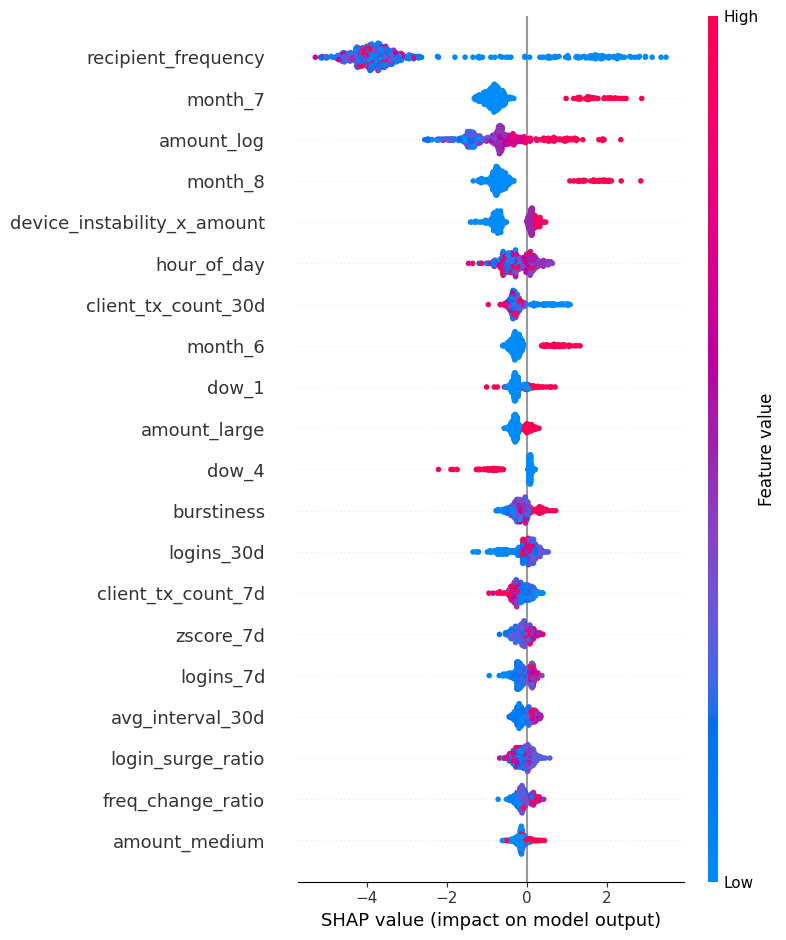


=== Global Feature Importance (LightGBM) ===


/usr/local/python/3.12.1/lib/python3.12/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


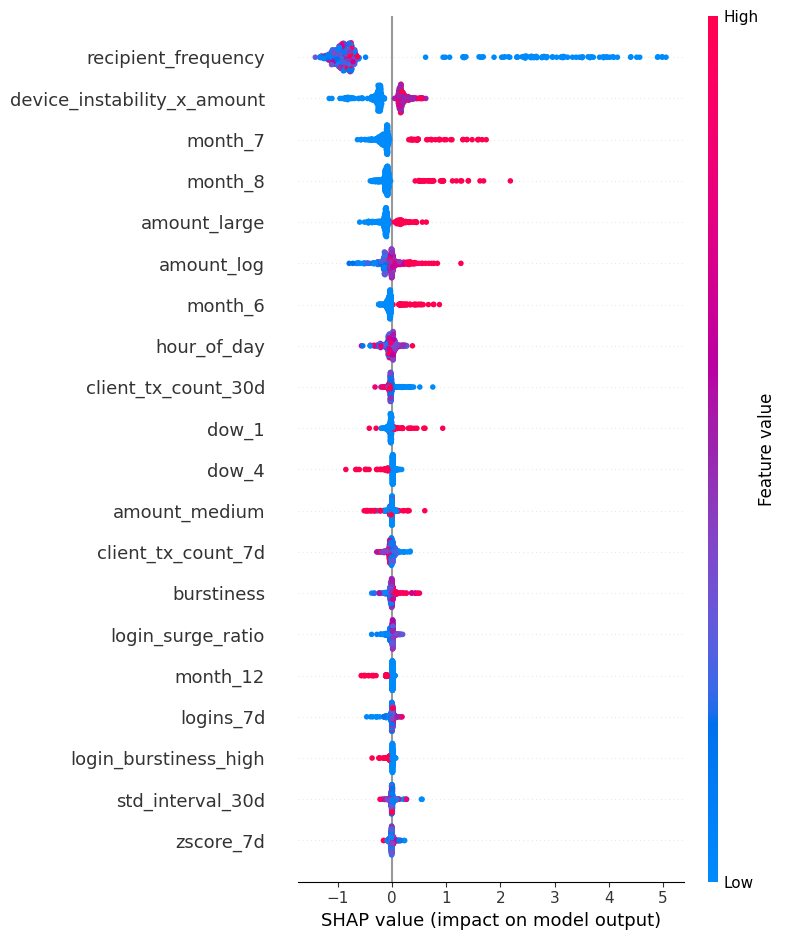

In [115]:
import shap
import numpy as np
import matplotlib.pyplot as plt

sample_idx = 100
sample_2d = X_test_scaled[sample_idx].reshape(1, -1)

# 1. SHAP for XGBoost
print("=== XGBoost SHAP Explanation ===")
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(sample_2d)[0]

top_features_xgb = sorted(
    zip(range(len(shap_values_xgb)), np.abs(shap_values_xgb)),
    key=lambda x: x[1],
    reverse=True
)[:5]

print(f"Sample {sample_idx} - Top 5 XGBoost factors:")
for feat_idx, importance in top_features_xgb:
    feature_name = X.columns[feat_idx] if feat_idx < len(X.columns) else f"Feature_{feat_idx}"
    print(f"  {feature_name}: {importance:.4f}")

# 2. SHAP for LightGBM
print("\n=== LightGBM SHAP Explanation ===")
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = explainer_lgb.shap_values(sample_2d)[0]

top_features_lgb = sorted(
    zip(range(len(shap_values_lgb)), np.abs(shap_values_lgb)),
    key=lambda x: x[1],
    reverse=True
)[:5]

print(f"Sample {sample_idx} - Top 5 LightGBM factors:")
for feat_idx, importance in top_features_lgb:
    feature_name = X.columns[feat_idx] if feat_idx < len(X.columns) else f"Feature_{feat_idx}"
    print(f"  {feature_name}: {importance:.4f}")

# 3. Global Feature Importance - XGBoost
print("\n=== Global Feature Importance (XGBoost) ===")
sample_size = min(500, len(X_test_scaled))
shap_values_xgb_global = explainer_xgb.shap_values(X_test_scaled[:sample_size])

shap.summary_plot(shap_values_xgb_global, X_test_scaled[:sample_size], 
                  feature_names=X.columns, show=False)
plt.savefig('shap_summary_xgb.png', dpi=100, bbox_inches='tight')
plt.show()

# 4. Global Feature Importance - LightGBM
print("\n=== Global Feature Importance (LightGBM) ===")
shap_values_lgb_global = explainer_lgb.shap_values(X_test_scaled[:sample_size])

shap.summary_plot(shap_values_lgb_global, X_test_scaled[:sample_size], 
                  feature_names=X.columns, show=False)
plt.savefig('shap_summary_lgb.png', dpi=100, bbox_inches='tight')
plt.show()


In [116]:
import shap
import numpy as np
import pandas as pd

# ---- XGBoost SHAP importance ----
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_xgb = explainer_xgb.shap_values(X_test_scaled)    # shape: (n_samples, n_features)

mean_abs_shap_xgb = np.abs(shap_xgb).mean(axis=0)

imp_xgb = (
    pd.DataFrame({"feature": X.columns, "mean_abs_shap": mean_abs_shap_xgb})
    .sort_values("mean_abs_shap", ascending=False)
    .reset_index(drop=True)
)

# ---- LightGBM SHAP importance ----
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_lgb = explainer_lgb.shap_values(X_test_scaled)

# if LightGBM returns list (binary classification), take class 1
if isinstance(shap_lgb, list):
    shap_lgb = shap_lgb[1]

mean_abs_shap_lgb = np.abs(shap_lgb).mean(axis=0)

imp_lgb = (
    pd.DataFrame({"feature": X.columns, "mean_abs_shap": mean_abs_shap_lgb})
    .sort_values("mean_abs_shap", ascending=False)
    .reset_index(drop=True)
)

print("Top 10 XGBoost features:\n", imp_xgb.head(10), "\n")
print("Top 10 LightGBM features:\n", imp_lgb.head(10))


Top 10 XGBoost features:
                        feature  mean_abs_shap
0          recipient_frequency       3.417470
1                      month_7       0.938435
2                   amount_log       0.900123
3                      month_8       0.788636
4  device_instability_x_amount       0.473801
5                  hour_of_day       0.340802
6                      month_6       0.332923
7          client_tx_count_30d       0.323546
8                        dow_1       0.260821
9                 amount_large       0.248294 

Top 10 LightGBM features:
                        feature  mean_abs_shap
0          recipient_frequency       1.234807
1  device_instability_x_amount       0.260918
2                      month_7       0.216199
3                      month_8       0.174526
4                 amount_large       0.148156
5                   amount_log       0.127827
6                      month_6       0.087773
7                  hour_of_day       0.068446
8                        

/usr/local/python/3.12.1/lib/python3.12/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [117]:
# ---- choose quantile threshold ----
q = 0.10   # bottom 10%

thr_xgb = imp_xgb["mean_abs_shap"].quantile(q)
thr_lgb = imp_lgb["mean_abs_shap"].quantile(q)

unused_xgb = imp_xgb[imp_xgb["mean_abs_shap"] <= thr_xgb]["feature"].tolist()
unused_lgb = imp_lgb[imp_lgb["mean_abs_shap"] <= thr_lgb]["feature"].tolist()

print(f"\nXGBoost – almost unused features (bottom {int(q*100)}%):")
for f in unused_xgb:
    print(" ", f)

print(f"\nLightGBM – almost unused features (bottom {int(q*100)}%):")
for f in unused_lgb:
    print(" ", f)



XGBoost – almost unused features (bottom 10%):
  session_interval_anomaly
  inactive_x_large_tx
  recent_device_change
  anomaly_timing
  month_11

LightGBM – almost unused features (bottom 10%):
  month_2
  inactive_x_large_tx
  recent_device_change
  anomaly_timing
  month_11


In [118]:
unused_both = sorted(set(unused_xgb).intersection(unused_lgb))
print("\nFeatures almost unused in BOTH models:")
for f in unused_both:
    print(" ", f)


Features almost unused in BOTH models:
  anomaly_timing
  inactive_x_large_tx
  month_11
  recent_device_change


#PHASE 7: DEPLOYMENT & DEMO
##7.1 Inference Pipeline

In [119]:
import pickle
import numpy as np

# Save models
with open('models.pkl', 'wb') as f:
    pickle.dump({
        'xgb': xgb_model,
        'lgb': lgb_model,
        'best_threshold' : best_threshold,
        'rf': rf_model,
        'meta_learner': meta_learner,
        'scaler': scaler
    }, f)

In [ ]:
# Kill all existing ngrok processes
!pkill -f ngrok
import time
time.sleep(2)

# Now try again
from pyngrok import ngrok

ngrok.set_auth_token("363ztB5jL7ZMgk1PCPTuWpzl4IO_3ASuwrF6zJmChq8eH8dDu")
public_url = ngrok.connect(8501)

print(f"\n{'='*80}")
print(f"✓ STREAMLIT APP IS LIVE!")
print(f"{'='*80}")
print(f"\n🔗 Open this link on your iPad/browser:\n")
print(f"   {public_url}\n")
print(f"{'='*80}\n")


✓ STREAMLIT APP IS LIVE!

🔗 Open this link on your iPad/browser:

   NgrokTunnel: "https://lexicographically-unopiatic-magaret.ngrok-free.dev" -> "http://localhost:8501"




In [ ]:
!streamlit run app.py --server.port 8501 --logger.level=error





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.0.0.48:8501
  External URL: http://4.240.39.193:8501

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
/home/codespace/.local/lib/python3.12/site-packages/sklearn/